# Community Detection

This is a test notebook to see how to use the cdlib library for community detection

In [ ]:
# !pip install cdlib
# !pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.5 MB/s eta 0:00:00


In [22]:
from cdlib import algorithms, viz

from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx

import networkx as nx
import torch
import matplotlib.pyplot as plt
plt.style.use('default')


Import the karate club network graph.

In [23]:
# Import dataset using PyG    
dataset = KarateClub()

In [24]:
# Print information
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [25]:
# Get the first graph from the dataset (Karate Club only contains one graph)
data = dataset[0]

print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


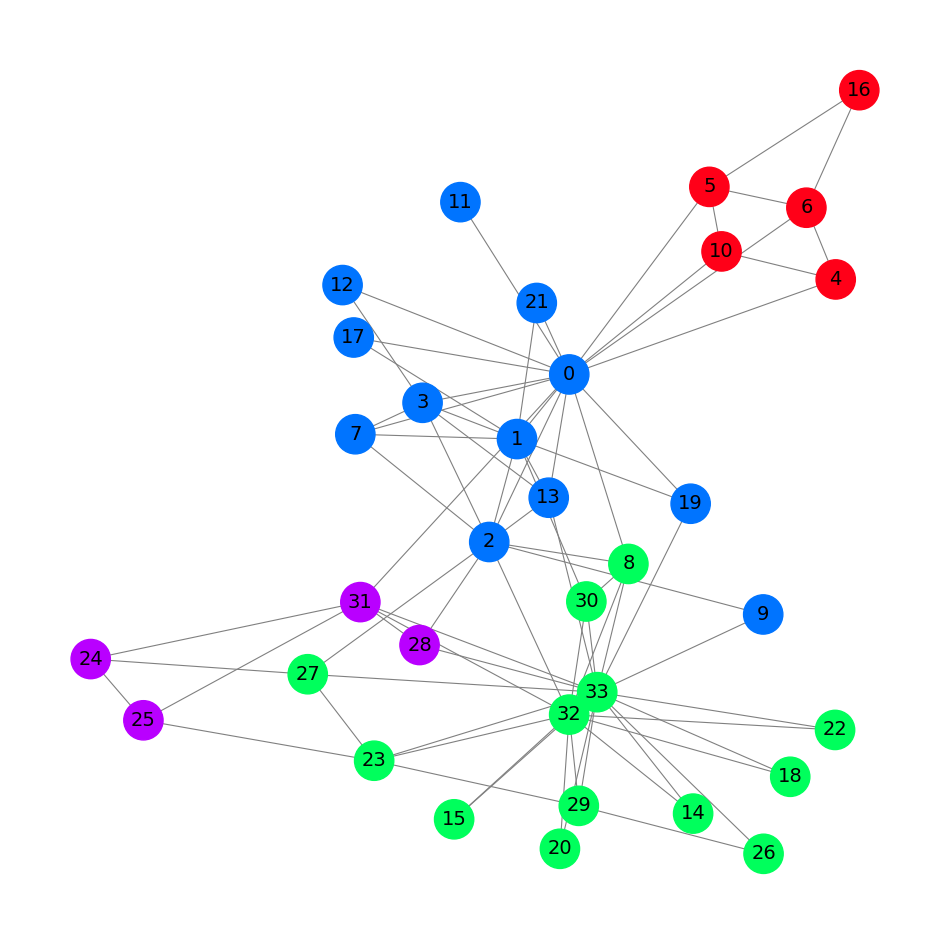

In [26]:
# Convert PyG data to NetworkX graph and visualize it
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12, 12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 with_labels=True,
                 node_size=800,
                 node_color=data.y,
                 cmap="hsv",
                 vmin=-2,
                 vmax=3,
                 width=0.8,
                 edge_color="grey",
                 font_size=14
                 )
plt.show()


## Community Detection Algorithm from Pirrò Paper

1. **Louvain** (`louv`): a multi-level modularity optimization algorithm, which runs in time $O(\vert V \vert log \vert V \vert)$;
2. **WalkTrap** (`walk`): based on the idea that random walks are more likely to stay in the same community. This algorithm runs in time $O(\vert V \vert^2 log \vert V \vert)$;
3. **Greedy** (`gre`): based on a greedy modularity maximization strategy and running in time $O(\vert V \vert log^2 \vert V \vert )$;
4. **InfoMap** (`inf`): it returns a community structure, which provides the shortest description length for a random walk. This algorithm runs in time O(jEj);
5. **Label propagation** (`lab`): it assigns to every node one of k labels and then re-assigns labels to nodes in a way that each node takes the most frequent label of its neighbors. This algorithm runs in time $O(\vert E \vert)$;
6. **Leading Eigenvectors** (`eig`): a top-down hierarchical approach based on modularity. Its complexity is $O( \vert V \vert (\vert E \vert + \vert V \vert))$, or $O(\vert V \vert^2 )$ on a sparse graph;
7. **Edge-Betweeness** (`btw`): a hierarchical decomposition process where edges are removed in the decreasing order of their edge betweenness scores. This algorithm runs in time $O(\vert E \vert^2 \vert V \vert)$;
8. **SpinGlass** (`spin`): it reduces community detection to the problem of finding the ground state of an infinite spin glass. The complexity is $O(V^{3.2} )$;
9. **Optimal** (`opt`): it uses integer programming and has exponential complexity.
10. **Scalable Community Detection** (`scd`), which partitions the graph by maximizing the Weighted Community Clustering, a community detection metric based on triangle analysis. The time complexity is $O(\vert E \vert log \vert V \vert )$.

Community Louvain
[[8, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33], [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [24, 25, 28, 31]]
------------


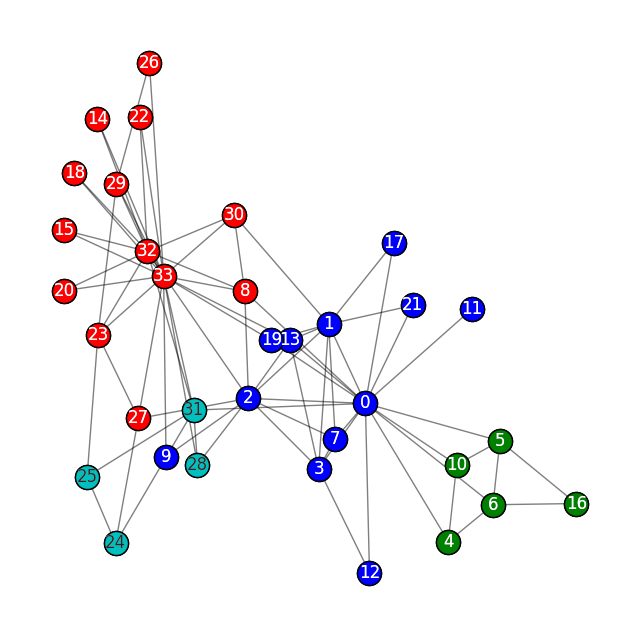

In [31]:
# 1. louv
coms = algorithms.louvain(G, weight='weight', resolution=1., randomize=False)

print("Community Louvain")
print(coms.communities)
print('------------')
# viz.plot_community_graph(G, coms, plot_labels=True, node_size=300)
viz.plot_network_clusters(G, coms, plot_labels=True, node_size=300)


WalkTrap
[[0, 1, 3, 7, 11, 12, 17, 19, 21], [14, 15, 18, 20, 22, 26, 29, 32, 33], [2, 8, 9, 13, 28, 30, 31], [4, 5, 6, 10, 16], [23, 24, 25, 27]]
------------


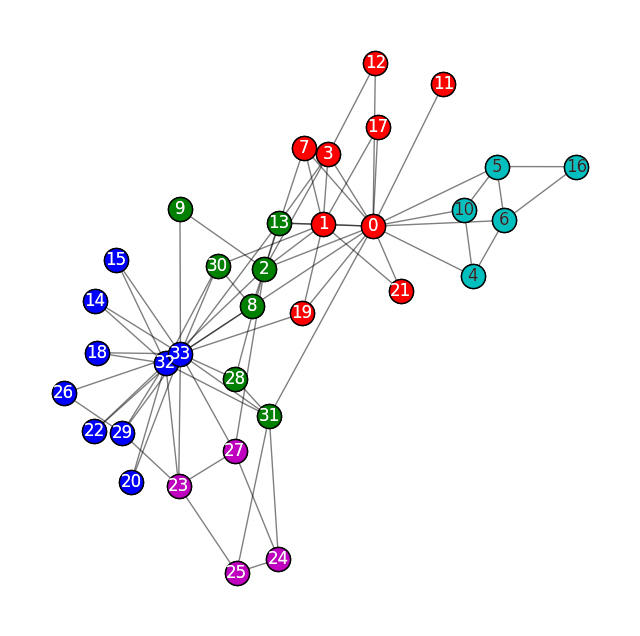

In [33]:
# 2. walk
coms = algorithms.walktrap(G)

print("Community WalkTrap")
print(coms.communities)
print('------------')
# viz.plot_community_graph(G, coms, plot_labels=True, node_size=300)
viz.plot_network_clusters(G, coms, plot_labels=True, node_size=300)


In [ ]:
# 3. gre
coms = algorithms.greedy_modularity(G)

print("Community Greedy")
print(coms.communities)
print('------------')
# viz.plot_community_graph(G, coms, plot_labels=True, node_size=300)
viz.plot_network_clusters(G, coms, plot_labels=True, node_size=300)


[[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 [1, 2, 3, 7, 9, 12, 13, 17, 21],
 [0, 16, 19, 4, 5, 6, 10, 11]]

Community InfoMap
[[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16]]
------------


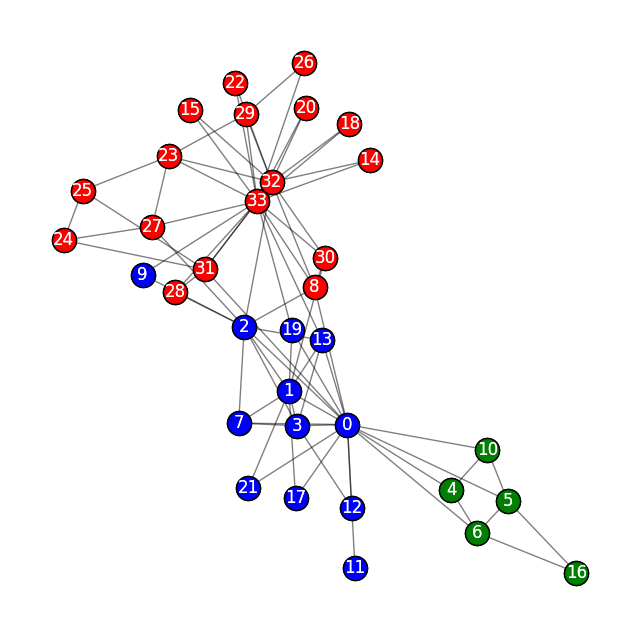

In [34]:
# 4. inf
coms = algorithms.infomap(G)

print("Community InfoMap")
print(coms.communities)
print('------------')
# viz.plot_community_graph(G, coms, plot_labels=True, node_size=300)
viz.plot_network_clusters(G, coms, plot_labels=True, node_size=300)


Community Label Propagation
[[32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30], [0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31], [16, 5, 6]]
------------


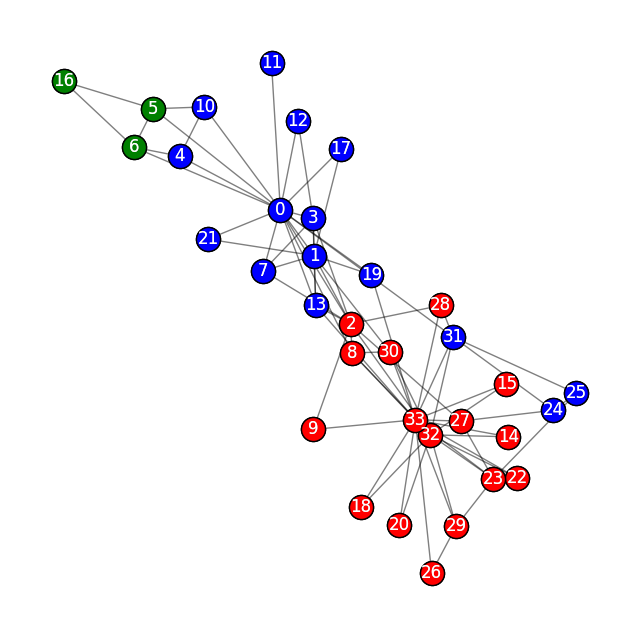

In [35]:
# 5. lab
coms = algorithms.label_propagation(G)

print("Community Label Propagation")
print(coms.communities)
print('------------')
# viz.plot_community_graph(G, coms, plot_labels=True, node_size=300)
viz.plot_network_clusters(G, coms, plot_labels=True, node_size=300)


Community Eigenvector
[[32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30], [0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31], [16, 5, 6]]
------------


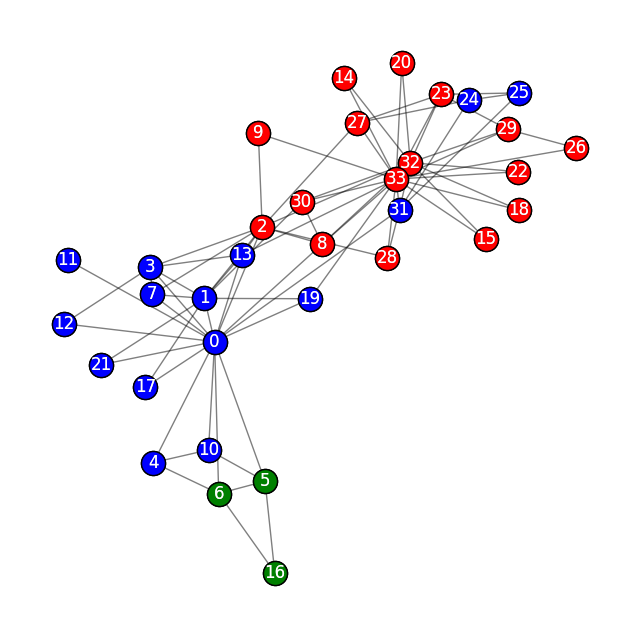

In [36]:
# 6. eig
com = algorithms.eigenvector(G)

print("Community Eigenvector")
print(coms.communities)
print('------------')
# viz.plot_community_graph(G, coms, plot_labels=True, node_size=300)
viz.plot_network_clusters(G, coms, plot_labels=True, node_size=300)


Community Edges-Betweenness
[[23, 27, 29, 26, 31, 28, 25, 24, 32, 14, 15, 18, 22, 33, 20, 30, 8], [21, 17, 1, 19, 12, 3, 7, 11, 0, 9, 2, 13, 16, 5, 6, 10, 4]]
------------


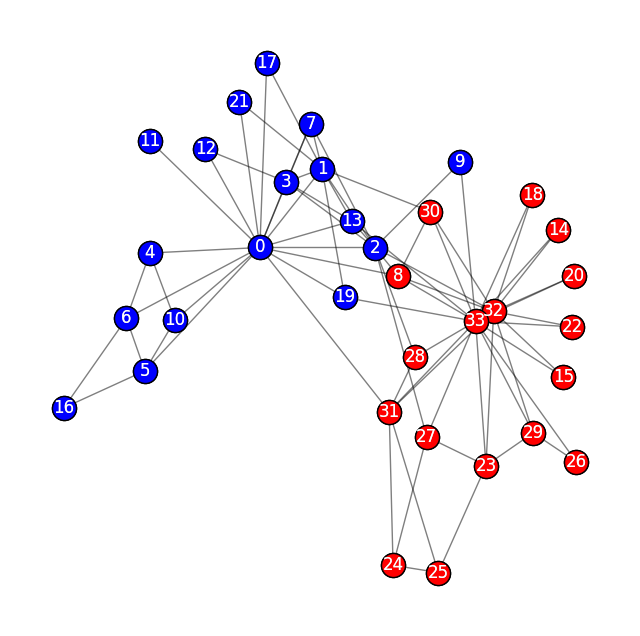

In [41]:
# 7. btw
# In this library there isn't an Edge-Betweenness algorithm
coms = algorithms.head_tail(G, head_tail_ratio=0.1) # Not sure that it is this

print("Community Edges-Betweenness") 
print(coms.communities)
print('------------')
# viz.plot_community_graph(G, coms, plot_labels=True, node_size=300)
viz.plot_network_clusters(G, coms, plot_labels=True, node_size=300)


Community SpinGlass
[[0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21], [8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [23, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16]]
------------


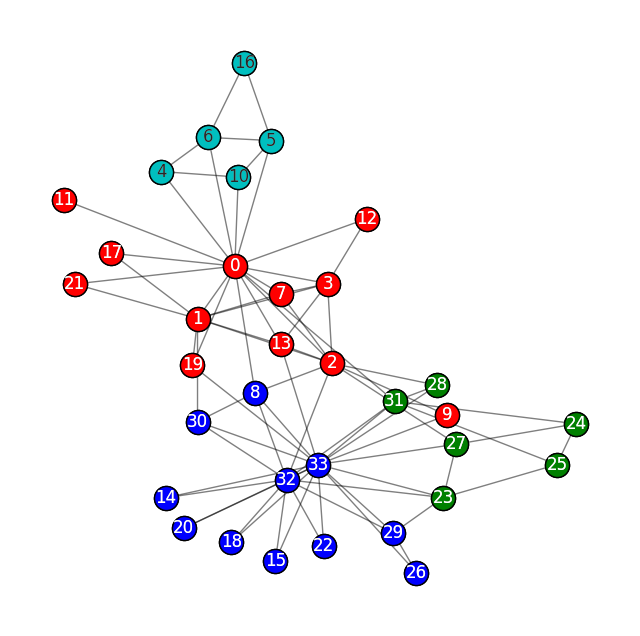

In [38]:
# 8. spin
coms = algorithms.spinglass(G)
print("Community SpinGlass")
print(coms.communities)
print('------------')
# viz.plot_community_graph(G, coms, plot_labels=True, node_size=300)
viz.plot_network_clusters(G, coms, plot_labels=True, node_size=300)


In [ ]:
# 9. opt

# coms.communities

In [ ]:
# 10. scd

# coms.communities